# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [5]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'cleaned_airbnb_data.csv'
df = pd.read_csv(path)
df.head()

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_numeric,host_response_rate_numeric,host_acceptance_rate_numeric
0,2992450,https://www.airbnb.com/rooms/2992450,2025-08-04,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,https://www.airbnb.com/users/show/4621559,...,3.67,f,1,1,0,0,0.07,70.0,NaN,50.0
1,3820211,https://www.airbnb.com/rooms/3820211,2025-08-04,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,https://www.airbnb.com/users/show/19648678,...,4.77,f,4,4,0,0,2.32,104.0,100.0,100.0
2,5651579,https://www.airbnb.com/rooms/5651579,2025-08-04,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,https://www.airbnb.com/users/show/29288920,...,4.64,f,2,1,1,0,2.97,75.0,100.0,99.0
3,6623339,https://www.airbnb.com/rooms/6623339,2025-08-04,city scrape,Bright & Cozy City Stay · Top Location + Parking!,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,https://www.airbnb.com/users/show/19648678,...,4.72,f,4,4,0,0,2.68,101.0,100.0,100.0
4,9005989,https://www.airbnb.com/rooms/9005989,2025-08-04,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,https://www.airbnb.com/users/show/17766924,...,4.77,f,1,1,0,0,5.67,110.0,NaN,100.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   last_scraped                                  459 non-null    object 
 3   source                                        459 non-null    object 
 4   name                                          459 non-null    object 
 5   description                                   449 non-null    object 
 6   neighborhood_overview                         196 non-null    object 
 7   picture_url                                   459 non-null    object 
 8   host_id                                       459 non-null    int64  
 9   host_url                                      459 non-null    obj

## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



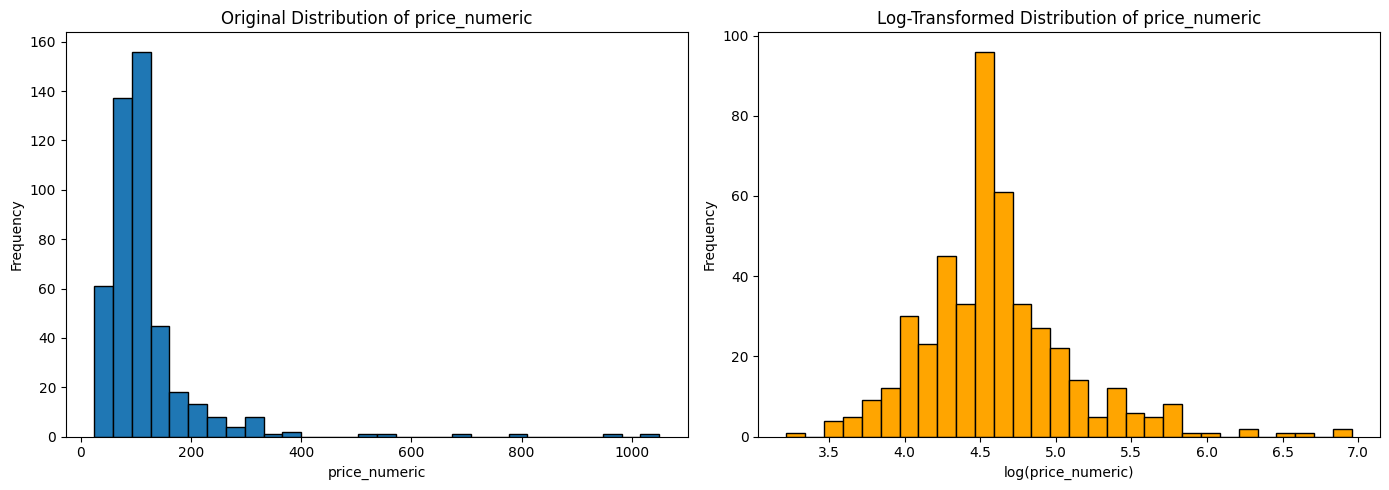

Original price_numeric - Skewness: 5.45
Transformed price_numeric - Skewness: 1.03


In [7]:
# Add code here 🔧
# Choose a column that appears skewed
column_to_check = 'price_numeric'

# Plot original distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[column_to_check].dropna(), bins=30, edgecolor='black')
axes[0].set_title(f'Original Distribution of {column_to_check}')
axes[0].set_xlabel(column_to_check)
axes[0].set_ylabel('Frequency')

# Apply log transformation
df['price_log'] = np.log1p(df[column_to_check])

# Plot transformed distribution
axes[1].hist(df['price_log'].dropna(), bins=30, edgecolor='black', color='orange')
axes[1].set_title(f'Log-Transformed Distribution of {column_to_check}')
axes[1].set_xlabel(f'log({column_to_check})')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show statistics
print(f"Original {column_to_check} - Skewness: {df[column_to_check].skew():.2f}")
print(f"Transformed {column_to_check} - Skewness: {df['price_log'].skew():.2f}")

### ✍️ Your Response: 🔧
1.

2.

3.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose two columns with different ranges
col1 = 'price_numeric'
col2 = 'number_of_reviews'

# Min-Max scale on price_numeric
scaler_minmax = MinMaxScaler()
df['price_minmax_scaled'] = scaler_minmax.fit_transform(df[[col1]])

# Z-score scale on number_of_reviews
scaler_standard = StandardScaler()
df['reviews_standardized'] = scaler_standard.fit_transform(df[[col2]])

# Display comparison
print("Original vs Scaled Values:")
print("\nPrice (Min-Max Scaling):")
print(df[[col1, 'price_minmax_scaled']].describe())
print("\nNumber of Reviews (Z-score Normalization):")
print(df[[col2, 'reviews_standardized']].describe())

Original vs Scaled Values:

Price (Min-Max Scaling):
       price_numeric  price_minmax_scaled
count     459.000000           459.000000
mean      116.104575             0.089771
std        96.346706             0.093905
min        24.000000             0.000000
25%        73.000000             0.047758
50%        95.000000             0.069201
75%       121.000000             0.094542
max      1050.000000             1.000000

Number of Reviews (Z-score Normalization):
       number_of_reviews  reviews_standardized
count         459.000000            459.000000
mean           58.644880              0.000000
std           109.379444              1.001091
min             0.000000             -0.536745
25%             2.000000             -0.518440
50%            19.000000             -0.362848
75%            65.000000              0.058165
max           948.000000              8.139788


### ✍️ Your Response: 🔧
1.

2.

3.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [9]:
# Add code here 🔧
# Choose a numeric column to group
column_to_group = 'number_of_reviews'

# Create bins using quantile-based binning
df['review_volume_category'] = pd.qcut(df[column_to_group],
                                         q=3,
                                         labels=['Low', 'Medium', 'High'],
                                         duplicates='drop')

# Display distribution
print("Review Volume Category Distribution:")
print(df['review_volume_category'].value_counts().sort_index())

# Show some examples
print("\nSample rows with categories:")
print(df[[column_to_group, 'review_volume_category']].head(10))

Review Volume Category Distribution:
review_volume_category
Low       155
Medium    156
High      148
Name: count, dtype: int64

Sample rows with categories:
   number_of_reviews review_volume_category
0                  9                 Medium
1                310                   High
2                371                   High
3                332                   High
4                621                   High
5                428                   High
6                821                   High
7                201                   High
8                231                   High
9                 28                 Medium


### ✍️ Your Response: 🔧
1.

2.

3.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [10]:
# Add code here 🔧
# Variable 1: Price per person (price divided by accommodates)
df['price_per_person'] = df['price_numeric'] / df['accommodates']

# Variable 2: Long-term stay flag (minimum nights >= 30 days)
df['is_long_term_stay'] = (df['minimum_nights'] >= 30).astype(int)

# Display summary of new variables
print("New Variable 1 - Price Per Person:")
print(df['price_per_person'].describe())
print(f"\nNew Variable 2 - Long-term Stay Distribution:")
print(df['is_long_term_stay'].value_counts())

# Show examples
print("\nSample rows with new variables:")
print(df[['name', 'price_numeric', 'accommodates', 'price_per_person',
          'minimum_nights', 'is_long_term_stay']].head(10))

New Variable 1 - Price Per Person:
count    459.000000
mean      39.376140
std       20.631773
min        5.937500
25%       26.225000
50%       36.000000
75%       47.500000
max      262.500000
Name: price_per_person, dtype: float64

New Variable 2 - Long-term Stay Distribution:
is_long_term_stay
0    431
1     28
Name: count, dtype: int64

Sample rows with new variables:
                                                name  price_numeric  \
0                         Luxury 2 bedroom apartment           70.0   
1  Funky Urban Gem: Prime Central Location - Park...          104.0   
2         Large studio apt  by Capital Center & ESP@           75.0   
3  Bright & Cozy City Stay · Top Location + Parking!          101.0   
4     Studio in The heart of Center SQ, in Albany NY          110.0   
5   Spacious suite with full bath by Capital  Center           60.0   
6          Alb hospital area studio bath wifi. (Red)           47.0   
7  /Fire Place Bungalow\ 1917 SUNY Eagle 6Beds 2B...    

### ✍️ Your Response: 🔧 🔧
1.

2.

3.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [11]:
# Add code here 🔧
# Choose a categorical column to encode
column_to_encode = 'room_type'

# Check unique values
print(f"Unique values in {column_to_encode}:")
print(df[column_to_encode].value_counts())

# Apply one-hot encoding (since room_type is nominal/unordered)
df_encoded = pd.get_dummies(df, columns=[column_to_encode], prefix='room_type')

# Show the new columns created
print(f"\nNew encoded columns:")
new_cols = [col for col in df_encoded.columns if col.startswith('room_type_')]
print(new_cols)

# Display sample of encoded data
print("\nSample of encoded data:")
print(df_encoded[['name'] + new_cols].head(10))

# Update main dataframe
df = df_encoded

Unique values in room_type:
room_type
Entire home/apt    336
Private room       123
Name: count, dtype: int64

New encoded columns:
['room_type_Entire home/apt', 'room_type_Private room']

Sample of encoded data:
                                                name  \
0                         Luxury 2 bedroom apartment   
1  Funky Urban Gem: Prime Central Location - Park...   
2         Large studio apt  by Capital Center & ESP@   
3  Bright & Cozy City Stay · Top Location + Parking!   
4     Studio in The heart of Center SQ, in Albany NY   
5   Spacious suite with full bath by Capital  Center   
6          Alb hospital area studio bath wifi. (Red)   
7  /Fire Place Bungalow\ 1917 SUNY Eagle 6Beds 2B...   
8  $55twin($30 foreign student)FreeBF Noa/c no smoke   
9           Private Room in the Hearth of the Albany   

   room_type_Entire home/apt  room_type_Private room  
0                       True                   False  
1                       True                   False  
2    

### ✍️ Your Response: 🔧
1.
2.
3.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1.

2.

3.
4.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_07_LastnameFirstname.ipynb"